<a href="https://colab.research.google.com/github/ABHIRAM199/MY-ML-Projects/blob/main/Bussiness_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NinjaCart


* Business Case


Classifying images as potato, onion, tomato and other vegetables.
* Topic: CNN
Problem Statement
 * Ninjacart is India's largest fresh produce supply chain company. They are
pioneers
solving one of the toughest supply chain problems of the world by leveraging innovative
technology. They source fresh produce from farmers and deliver them to businesses
within 12 hours. An integral component of their automation process is the development
of robust classifiers which can distinguish between images of different types of
vegetables, while also correctly labeling images that do not contain any one type
vegetable as noise.
 * As a starting point, ninjacart has provided us with a dataset scraped from the web
contains train and test folders, each having 4 sub-folders with images of onions
potatoes, tomatoes and some market scenes. We have been tasked with preparing
multiclass classifier for identifying these vegetables. The dataset provided has
required images to achieve the task.

# **Case Study: Ninjacart**


Ninjacart is India's largest fresh produce supply chain company, connecting producers directly with the retailers.
* You are a Data Scientist at Ninjacart, you have curated a dataset consisting of some vegetables and other images at a vegetable market.
* You want to classify these images using computer vision with the most efficient and accurate model to integrate in your app.
* We will explore how to preprocess, load, augment our raw data and train state-of-the-art model architectures on it and compare them to
analyze the best model for our use-case.

In [ ]:
import zipfile
zip_file_path = "/content/drive/MyDrive/dataset/archive (18).zip"

# Define the directory to extract the files to
extract_to_directory = "/content/drive/MyDrive/path/to/extracted/files"

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_directory)

In [ ]:
import os
import glob
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics


# Tensorflow import
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, ReLU, Softmax, BatchNormalization, Dropout
from tensorflow.random import set_seed

In [ ]:
def training_plot(metrics, history):
  f, ax = plt.subplots(1, len(metrics), figsize=(5*len(metrics), 5))
  for idx, metric in enumerate(metrics):
    ax[idx].plot(history.history[metric], ls='dashed')
    ax[idx].set_xlabel("Epochs")
    ax[idx].set_ylabel(metric)
    ax[idx].plot(history.history['val_' + metric]);
    ax[idx].legend([metric, 'val_' + metric])

def ConfusionMatrix(model, ds, label_list):
# Note: This logic doesn't work with shuffled datasets
    plt.figure(figsize=(15,15))
    y_pred = model.predict(ds)
    predicted_categories = tf.argmax(y_pred, axis=1)
    true_categories = tf.concat([y for x, y in ds], axis=0)
    cm = metrics.confusion_matrix(true_categories,predicted_categories) # last batch
    sns.heatmap(cm, annot=True, xticklabels=label_list, yticklabels=label_list, cmap="YlGnBu", fmt='g')
    plt.show()

def testAccuracy(model):
    true_categories = tf.concat([y for x, y in test_ds], axis=0)
    images = tf.concat([x for x, y in test_ds], axis=0)
    y_pred = model.predict(test_ds)
    class_names = test_data.class_names
    predicted_categories = tf.argmax(y_pred, axis=1)
    test_acc = metrics.accuracy_score(true_categories, predicted_categories) * 100
    print(f'\nTest Accuracy: {test_acc:.2f}%\n')

def plot_image(pred_array, true_label, img, class_names):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(pred_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ".format(class_names[predicted_label],
                                100*np.max(pred_array),
                                ),
                                color=color)

def predictions(model):
    true_categories = tf.concat([y for x, y in test_ds], axis=0)
    images = tf.concat([x for x, y in test_ds], axis=0)
    y_pred = model.predict(test_ds)
    class_names = test_data.class_names
    # Randomly sample 15 test images and plot it with their predicted labels, and the true labels.
    indices = random.sample(range(len(images)), 15)
    # Color correct predictions in blue and incorrect predictions in red.
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    plt.figure(figsize=(4*num_cols, 2*num_rows))
    for i,index in enumerate(indices):
      plt.subplot(num_rows, num_cols, i+1)
      plot_image(y_pred[index], true_categories[index], images[index],class_names)
    plt.tight_layout()
    plt.show()

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint("final_model.h5", save_best_only=True)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",patience=5, restore_best_weights=True
)

In [ ]:
set_seed(111) # set random seed

# To supress any warnings during the flow
import warnings
warnings.filterwarnings('ignore')

In [ ]:
class_dirs = os.listdir("/content/drive/MyDrive/path/to/extracted/files/Vegetable Images/train") # list all directories inside "train" folder

image_dict = {} # dict to store image array(key) for every class(value)

count_dict = {} # dict to store count of files(key) for every class(value)

# iterate over all class_dirs
for cls in class_dirs:
    # get list of all paths inside the subdirectory
    file_paths = glob.glob(f'/content/drive/MyDrive/path/to/extracted/files/Vegetable Images/train/{cls}/*')
    # count number of files in each class and add it to count_dict
    count_dict[cls] = len(file_paths)
    # select random item from list of image paths
    image_path = random.choice(file_paths)
    # load image using keras utility function and save it in image_dict
    image_dict[cls] = tf.keras.utils.load_img(image_path)

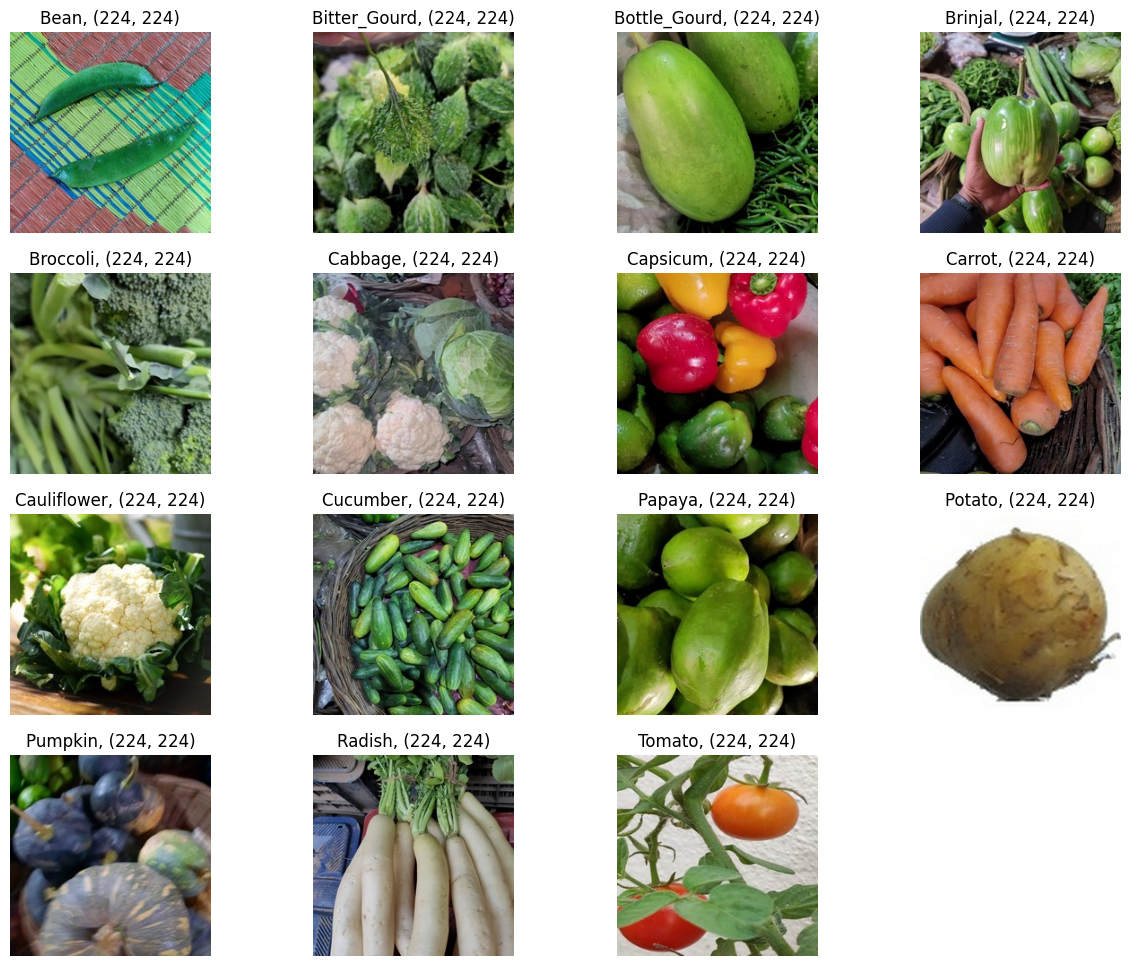

In [ ]:
plt.figure(figsize=(15, 12))
# iterate over dictionary items (class label, image array)
for i, (cls,img) in enumerate(image_dict.items()):
    # create a subplot axis
    ax = plt.subplot(4, 4, i + 1)
    # plot each image
    plt.imshow(img)
    # set "class name" along with "image size" as title
    plt.title(f'{cls}, {img.size}')
    plt.axis("off")

In [ ]:
## Let's now Plot the Data Distribution of Training Data across Classes
df_count_train = pd.DataFrame({
    "class": count_dict.keys(),     # keys of count_dict are class labels
    "count": count_dict.values(),   # value of count_dict contain counts of each class
})
print("Count of training samples per class:\n", df_count_train)


Count of training samples per class:
            class  count
0           Bean   1000
1   Bitter_Gourd   1000
2   Bottle_Gourd   1000
3        Brinjal   1000
4       Broccoli   1000
5        Cabbage   1000
6       Capsicum   1000
7         Carrot   1000
8    Cauliflower   1000
9       Cucumber   1000
10        Papaya   1000
11        Potato   1000
12       Pumpkin   1000
13        Radish   1000
14        Tomato   1000


<Figure size 1500x1200 with 0 Axes>

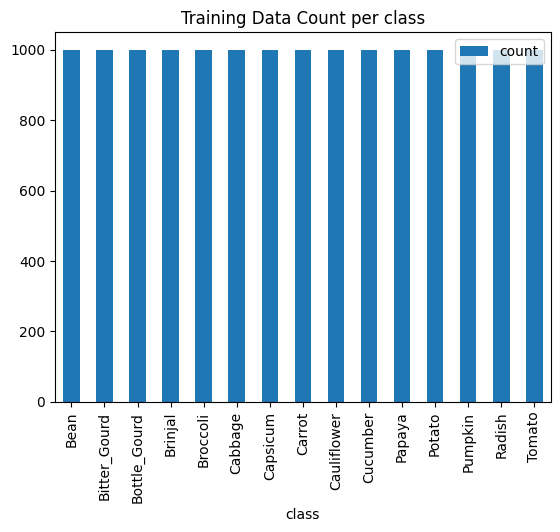

In [ ]:
plt.figure(figsize=(15,12))
df_count_train.plot.bar(x='class', y='count', title="Training Data Count per class")
plt.show()

In [ ]:
print('\nLoading Train Data...')
train_data = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/path/to/extracted/files/Vegetable Images/train", shuffle = True,
)

print('\nLoading Validation Data...')
val_data = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/path/to/extracted/files/Vegetable Images/validation", shuffle = False,
)

print('\nLoading Test Data...')
test_data = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/path/to/extracted/files/Vegetable Images/train", shuffle = False,
)


Loading Train Data...
Found 15000 files belonging to 15 classes.

Loading Validation Data...
Found 3000 files belonging to 15 classes.

Loading Test Data...
Found 15000 files belonging to 15 classes.


In [ ]:
height, width = 224, 224

# Data Processing Stage with resizing and rescaling operations
data_preprocess = keras.Sequential(
    name="data_preprocess",
    layers=[
        layers.Resizing(height, width), # Shape Preprocessing
        layers.Rescaling(1.0/255), # Value Preprocessing
    ]
)

# Perform Data Processing on the train, val, test dataset
train_ds = train_data.map(lambda x, y: (data_preprocess(x), y))
val_ds = val_data.map(lambda x, y: (data_preprocess(x), y))
test_ds = test_data.map(lambda x, y: (data_preprocess(x), y))

In [ ]:
num_classes = 15
hidden_size_1 = 1024
hidden_size_2 = 256

In [ ]:
model_ann = keras.Sequential(
    name="model_ann",
    layers=[
        layers.Flatten(input_shape=(height, width, 3)),
        layers.Dense(units=hidden_size_1, activation='relu'), # hidden layer 1
        layers.Dense(units=hidden_size_2, activation='relu'), # hidden layer 2
        layers.Dense(units=num_classes, activation='softmax'), # output layer
    ]
)

In [ ]:
model_ann.summary()

Model: "model_ann"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 1024)              154141696 
                                                                 
 dense_1 (Dense)             (None, 256)               262400    
                                                                 
 dense_2 (Dense)             (None, 15)                3855      
                                                                 
Total params: 154407951 (589.02 MB)
Trainable params: 154407951 (589.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


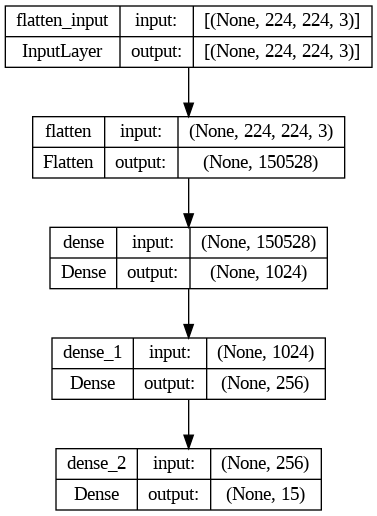

In [ ]:
tf.keras.utils.plot_model(model_ann, to_file="model_ann.png", show_shapes=True)

In [ ]:
model_ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
epochs = 25
model_fit = model_ann.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/25
469/469 [==============================] - 2414s 5s/step - loss: 11.4713 - accuracy: 0.2819 - val_loss: 1.8135 - val_accuracy: 0.4553
Epoch 2/25
469/469 [==============================] - 1701s 4s/step - loss: 1.8099 - accuracy: 0.4523 - val_loss: 1.5383 - val_accuracy: 0.5117
Epoch 3/25
363/469 [======================>.......] - ETA: 6:08 - loss: 1.5100 - accuracy: 0.5295

In [ ]:
training_plot(['loss', 'accuracy'], model_fit)


In [ ]:

testAccuracy(model_ann)

In [ ]:
ConfusionMatrix(model_ann, test_ds, test_data.class_names)

In [ ]:
model_base_cnn = keras.Sequential(
    name="model_base_cnn",
    layers=[
        layers.Conv2D(filters=16, kernel_size=3, strides=1, padding="same", activation='relu', input_shape=(height, width, 3)),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(units=256, activation='relu'),
        layers.Dense(units=num_classes, activation='softmax')
    ]
)

In [ ]:
model_base_cnn.summary()

In [ ]:
tf.keras.utils.plot_model(model_base_cnn, to_file="model_cnn.png", show_shapes=True)


In [ ]:
model_base_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
epochs = 25
model_base_cnn_fit = model_base_cnn.fit(train_ds, validation_data=val_ds, epochs=epochs)

In [ ]:
training_plot(['loss', 'accuracy'], model_base_cnn_fit)

In [ ]:
testAccuracy(model_base_cnn)

In [ ]:
ConfusionMatrix(model_base_cnn, test_ds, test_data.class_names)

In [ ]:
model_impv_cnn = keras.Sequential(
    name="model_impv_cnn_2",
    layers=[
        layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same", activation='relu', input_shape=(height, width, 3)),
        layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same", activation='relu', input_shape=(height, width, 3)),
        layers.MaxPooling2D(),
        layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation='relu', input_shape=(height, width, 3)),
        layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation='relu', input_shape=(height, width, 3)),
        layers.MaxPooling2D(),
        layers.Conv2D(filters=16, kernel_size=3, strides=1, padding="same", activation='relu', input_shape=(height, width, 3)),
        layers.Conv2D(filters=16, kernel_size=3, strides=1, padding="same", activation='relu', input_shape=(height, width, 3)),
        layers.MaxPooling2D(),
        layers.GlobalAveragePooling2D(),
        layers.Dense(units=num_classes, activation='softmax')
    ]
)
model_impv_cnn.summary()

In [ ]:
tf.keras.utils.plot_model(model_impv_cnn, to_file="model_cnn_2.png", show_shapes=True)

In [ ]:
model_impv_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
epochs = 25
model_fit = model_impv_cnn.fit(train_ds, validation_data=val_ds, epochs=epochs)

In [ ]:
training_plot(['loss', 'accuracy'], model_fit)

testAccuracy(model_impv_cnn)


ConfusionMatrix(model_impv_cnn, test_ds, test_data.class_names)

In [ ]:
model_bndr_cnn = keras.Sequential(
    name="model_cnn_4",
    layers=[
        layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same", activation='relu', input_shape=(height, width, 3)),
        layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same", activation='relu', input_shape=(height, width, 3)),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation='relu', input_shape=(height, width, 3)),
        layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation='relu', input_shape=(height, width, 3)),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Conv2D(filters=16, kernel_size=3, strides=1, padding="same", activation='relu', input_shape=(height, width, 3)),
        layers.Conv2D(filters=16, kernel_size=3, strides=1, padding="same", activation='relu', input_shape=(height, width, 3)),
        layers.MaxPooling2D(),
        layers.GlobalAveragePooling2D(),
        layers.Dropout(0.25),
        layers.Dense(units=num_classes, activation='softmax')
    ]
)

In [ ]:
model_bndr_cnn.summary()


In [ ]:
tf.keras.utils.plot_model(model_bndr_cnn, to_file="model_cnn_3.png", show_shapes=True)

In [ ]:
model_bndr_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
epochs = 25
model_bndr_cnn_fit = model_bndr_cnn.fit(train_ds, validation_data=val_ds, epochs=epochs, callbacks=[checkpoint_callback,early_stopping_callback])

In [ ]:
training_plot(['loss', 'accuracy'], model_bndr_cnn_fit)
testAccuracy(model_bndr_cnn)
ConfusionMatrix(model_bndr_cnn, test_ds, test_data.class_names)

In [ ]:
pretrained_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=[height,width, 3])
pretrained_model.trainable=False
vgg16_model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(15, activation='softmax')
])

In [ ]:
vgg16_model.summary()

In [ ]:
vgg16_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_vgg16 = vgg16_model.fit(train_ds, epochs=50, validation_data=val_ds,callbacks=[checkpoint_callback,early_stopping_callback])

In [ ]:
training_plot(['loss', 'accuracy'], history_vgg16)


In [ ]:
testAccuracy(vgg16_model)


ConfusionMatrix(vgg16_model, test_ds, test_data.class_names)

In [ ]:
pretrained_resnet_model = tf.keras.applications.ResNet50V2(weights='imagenet',
                         include_top=False,
                         input_tensor = (tf.keras.layers.Input(shape=(height,width,3)))
                         )
pretrained_resnet_model.trainable=False
resnet_model = tf.keras.Sequential([
    pretrained_resnet_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(15, activation='softmax')
])

In [ ]:
resnet_model.summary()

In [ ]:
resnet_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_resnet = resnet_model.fit(train_ds, epochs=25, validation_data=val_ds, callbacks=[checkpoint_callback,early_stopping_callback])

In [ ]:
training_plot(['loss', 'accuracy'], history_resnet)

In [ ]:
testAccuracy(resnet_model)
ConfusionMatrix(resnet_model, test_ds, test_data.class_names)

In [ ]:
pretrained_mobilenet_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=[height,width, 3])
pretrained_mobilenet_model.trainable=False
mobilenet_model = tf.keras.Sequential([
    pretrained_mobilenet_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(15, activation='softmax')
])

In [ ]:
history_mobilenet = mobilenet_model.fit(train_ds, epochs=10, validation_data=val_ds, callbacks=[checkpoint_callback,early_stopping_callback])

In [ ]:
mobilenet_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])training_plot(['loss', 'accuracy'], history_mobilenet)

testAccuracy(mobilenet_model)
ConfusionMatrix(mobilenet_model, test_ds, test_data.class_names)
mobilenet_model.summary()

In [ ]:
predictions(resnet_model)

In [ ]:
predictions(mobilenet_model)